<a href="https://colab.research.google.com/github/RitikaVinayakamurthy/CE888/blob/main/CE888Assignment2/2003204Assignment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the necessary libraries

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.applications import VGG16
from sklearn.metrics import accuracy_score
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from google.colab import drive
from zipfile import ZipFile
from random import shuffle
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import shutil
import glob
import PIL
import cv2
import os

#Defining the paramenters
IMG_SIZE = 254
LR = 1e-4


In [4]:
#Mounting to the google drive where the data is uploaded
drive.mount('/content/drive/')


Mounted at /content/drive/


In [5]:
# Unzipping the training data from the location
file_name = "/content/drive/MyDrive/Fire dataset/Training.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
#checking for the number of images in training folder
path, dirs, files = next(os.walk("/content/Training/Fire"))
print('Number of images with fire : {}'.format(len(files)))
path, dirs, files = next(os.walk("/content/Training/No_Fire"))
print('Number of images with No fire : {}'.format(len(files)))

Number of images with fire : 25018
Number of images with No fire : 14357


In [7]:
# Unzipping the test data from the location
file_name = "/content/drive/MyDrive/Fire dataset/Test.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
#checking for the number of images in test folder
path, dirs, files = next(os.walk("/content/Test/Fire"))
print('Number of images with fire : {}'.format(len(files)))
path, dirs, files = next(os.walk("/content/Test/No_Fire"))
print('Number of images with No fire : {}'.format(len(files)))

Number of images with fire : 5137
Number of images with No fire : 3480


In [9]:
#Saving the directory path 
Training_fire = '/content/Training/Fire'
fire_files = os.listdir(Training_fire)
Training_No_fire = '/content/Training/No_Fire'
No_fire_files = os.listdir(Training_No_fire)

In [10]:
#Loading the Training Fire and No Fire dataset to view them
lst_fire_img = glob.glob('/content/Training/Fire/*.jpg')
lst_non_fire_img = glob.glob('/content/Training/No_Fire/*.jpg')

In [11]:
 #merging and shuffeling of the training datasets
 lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

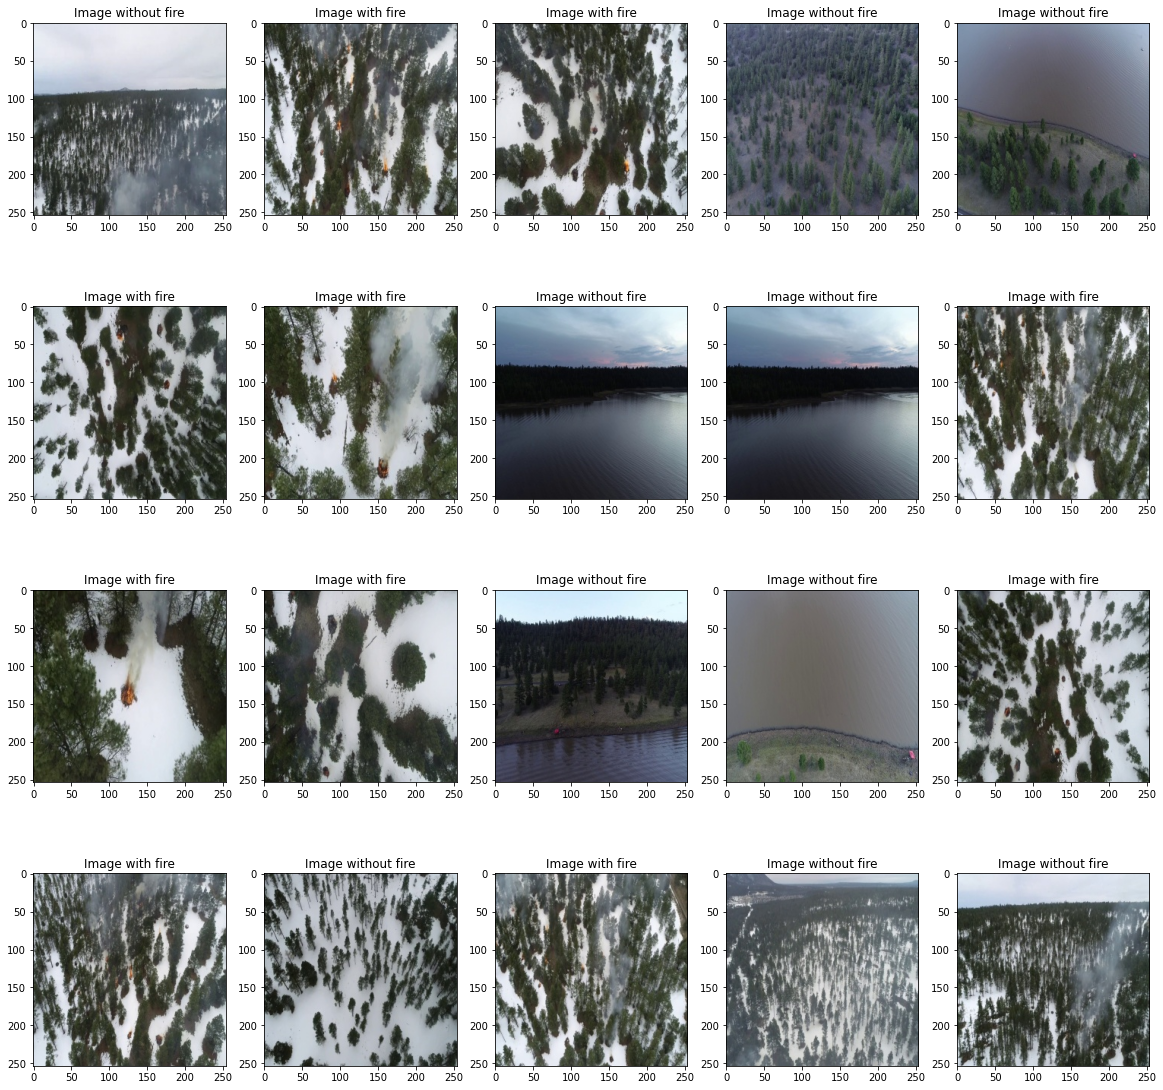

In [12]:
#Ploting the first 20 images to view
plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)

    if "No_Fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

In [13]:
#Loading an image to check the dimensions
image_dim = PIL.Image.open(str(lst_fire_img[1]))

In [14]:
#Width and height of the image
width, height = image_dim.size
print(width,height)

254 254


In [15]:
#checking the mode of the image
image_dim.mode

'RGB'

In [16]:
#Renaming the images of the training set
path = '/content/Training/Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['Fire.','.jpg'])))

path = '/content/Training/No_Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['No_Fire.','.jpg'])))

In [17]:
# Make new base directory for training
original_training_dir_fire = "/content/Training/Fire"
original_training_dir_no_fire = "/content/Training/No_Fire"
base_dir = '/content/Fire_No_Fire_training'
os.mkdir(base_dir)

In [18]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [19]:
#Selecting a range of images for training and validation
fnames = ['Fire.{}.jpg'.format(i) for i in range(10500)]
for fname in fnames:
    src = os.path.join(original_training_dir_fire, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['Fire.{}.jpg'.format(i) for i in range(10500, 13000)]
for fname in fnames:
    src = os.path.join(original_training_dir_fire, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(10500)]
for fname in fnames:
    src = os.path.join(original_training_dir_no_fire, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(10500, 13000)]
for fname in fnames:
    src = os.path.join(original_training_dir_no_fire, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
path, dirs, files = next(os.walk("/content/Fire_No_Fire_training/train"))
file_count = len(files)
print("No of train files ",file_count)

path, dirs, files = next(os.walk("/content/Fire_No_Fire_training/validation"))
file_count = len(files)
print("No of validation files ",file_count)

No of train files  21000
No of validation files  5000


In [21]:
#Renaming the images of the test set
path = '/content/Test/Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['Fire.','.jpg'])))

path = '/content/Test/No_Fire'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, str(index).join(['No_Fire.','.jpg'])))

In [22]:
# Make new base directory for test
original_test_dir_fire = "/content/Test/Fire"
original_test_dir_no_fire = "/content/Test/No_Fire"
base_dir = '/content/Fire_No_Fire_test'
os.mkdir(base_dir)

In [23]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [24]:
#Selecting a range of images for test set
fnames = ['Fire.{}.jpg'.format(i) for i in range(5137)]
for fname in fnames:
    src = os.path.join(original_test_dir_fire, fname)
    dst = os.path.join(test_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['No_Fire.{}.jpg'.format(i) for i in range(3480)]
for fname in fnames:
    src = os.path.join(original_test_dir_no_fire, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
#Labelling the dataset images
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'Fire': return 1
    elif word_label == 'No_Fire': return 0

In [26]:
#Function to split the images
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        #image=cv2.imread(path)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [27]:
#Spliting the training and validation set
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)

In [28]:
#Spliting the test set
test_X, test_y = createDataSplitSet(test_dir)

VGG16 model with adam optimiser

In [29]:
#defining the model input
model_inp = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [30]:
#Using the VGG16 pre-trained model 
vgg16model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=model_inp,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
vgg16model.summary()

553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
____________________________________________________________

In [31]:
#Adding the last layer to the model
from tensorflow.keras import layers
last_layer = vgg16model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer) 
vgg16model = Model(model_inp, out)

for layer in vgg16model.layers[:-1]:
	layer.trainable = False

vgg16model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [32]:
vgg16model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [33]:
#Early stopping criterion
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [34]:
#Fitting the VGG16 model
modelfit = vgg16model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
2100/2100 [==============================] - 1024s 487ms/step - loss: 0.1686 - acc: 0.9340 - val_loss: 0.1427 - val_acc: 0.9310
Epoch 2/10
2100/2100 [==============================] - 1018s 485ms/step - loss: 0.0714 - acc: 0.9750 - val_loss: 0.0958 - val_acc: 0.9662
Epoch 3/10
2100/2100 [==============================] - 1021s 486ms/step - loss: 0.0534 - acc: 0.9824 - val_loss: 0.0342 - val_acc: 0.9878
Epoch 4/10
2100/2100 [==============================] - 1009s 481ms/step - loss: 0.0392 - acc: 0.9874 - val_loss: 0.0233 - val_acc: 0.9924
Epoch 5/10
2100/2100 [==============================] - 1005s 479ms/step - loss: 0.0350 - acc: 0.9886 - val_loss: 0.0271 - val_acc: 0.9906
Epoch 6/10
2100/2100 [==============================] - 1005s 479ms/step - loss: 0.0292 - acc: 0.9896 - val_loss: 0.0261 - val_acc: 0.9910
Epoch 7/10
2100/2100 [==============================] - 987s 470ms/step - loss: 0.0303 - acc: 0.9881 - val_loss: 0.0496 - val_acc: 0.9756
Epoch 8/10
2100/2100 [======

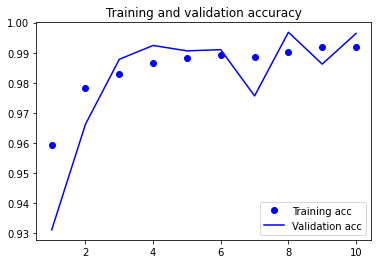

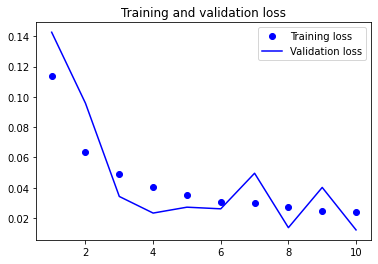

In [35]:
#Training accuracy

accuracy = modelfit.history['acc']
val_acc = modelfit.history['val_acc']
loss = modelfit.history['loss']
val_loss = modelfit.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
# Test prediction and accuracy
predictions = vgg16model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)



precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", accuracy[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9917619228363037
Val Accuracy:	 0.996399998664856
Test Accuracy:	 0.7572240919113381
Precision:	 0.8147612156295224
Recall:		 0.7671792875218999
F1 Score:	 0.790254662121516
AUC:		 0.7548540115770419


VGG16 model with RMSprop optimiser


In [48]:
#Using the VGG16 pre-trained model 
vgg16model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=model_inp,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
vgg16model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [49]:
#Adding the last layer to the model
from tensorflow.keras import layers
last_layer = vgg16model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer) 
vgg16model = Model(model_inp, out)

for layer in vgg16model.layers[:-1]:
	layer.trainable = False

vgg16model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0   

In [50]:
vgg16model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])

In [51]:
#Early stopping criterion
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [52]:
#Fitting the VGG16 model
modelfit = vgg16model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
2100/2100 [==============================] - 1027s 489ms/step - loss: 0.1713 - acc: 0.9362 - val_loss: 0.0860 - val_acc: 0.9654
Epoch 2/10
2100/2100 [==============================] - 1043s 497ms/step - loss: 0.0725 - acc: 0.9729 - val_loss: 0.0445 - val_acc: 0.9820
Epoch 3/10
2100/2100 [==============================] - 1029s 490ms/step - loss: 0.0587 - acc: 0.9789 - val_loss: 0.0359 - val_acc: 0.9862
Epoch 4/10
2100/2100 [==============================] - 1031s 491ms/step - loss: 0.0477 - acc: 0.9827 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 5/10
2100/2100 [==============================] - 1034s 493ms/step - loss: 0.0397 - acc: 0.9872 - val_loss: 0.0233 - val_acc: 0.9920
Epoch 6/10
2100/2100 [==============================] - 1029s 490ms/step - loss: 0.0353 - acc: 0.9869 - val_loss: 0.0231 - val_acc: 0.9916
Epoch 7/10
2100/2100 [==============================] - 1039s 495ms/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.0226 - val_acc: 0.9918
Epoch 8/10
2100/2100 [=====

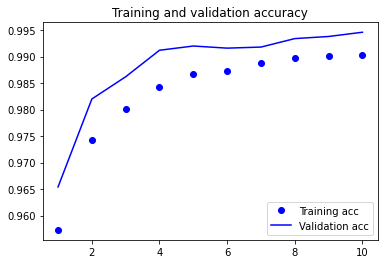

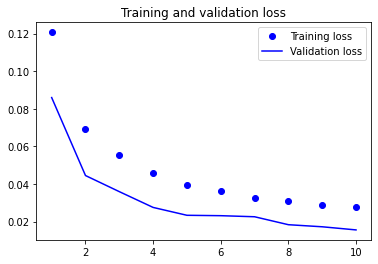

In [58]:
#Training accuracy

accuracy = modelfit.history['acc']
val_acc = modelfit.history['val_acc']
loss = modelfit.history['loss']
val_loss = modelfit.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
# Test prediction and accuracy
predictions = vgg16model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)



precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", accuracy[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9902380704879761
Val Accuracy:	 0.9945999979972839
Test Accuracy:	 0.753278403156551
Precision:	 0.8125389246418933
Recall:		 0.7619233015378626
F1 Score:	 0.7864175205947358
AUC:		 0.7512202714585865


CNN model

In [94]:
#Using the CNN model
import tensorflow as tf

from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (254,254,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 253, 253, 128)     1664      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 252, 252, 64)      32832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 125, 125, 32)      8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [69]:

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [71]:
modelfit = model.fit(train_X, train_y,
                               batch_size=32,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               )

Epoch 1/5
657/657 [==============================] - 1263s 2s/step - loss: 0.1055 - accuracy: 0.9687 - val_loss: 0.0569 - val_accuracy: 0.9834
Epoch 2/5
657/657 [==============================] - 1263s 2s/step - loss: 0.0522 - accuracy: 0.9856 - val_loss: 0.0471 - val_accuracy: 0.9878
Epoch 3/5
657/657 [==============================] - 1269s 2s/step - loss: 0.0314 - accuracy: 0.9924 - val_loss: 0.0548 - val_accuracy: 0.9878
Epoch 4/5
657/657 [==============================] - 1257s 2s/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0588 - val_accuracy: 0.9866
Epoch 5/5
657/657 [==============================] - 1261s 2s/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.0485 - val_accuracy: 0.9892


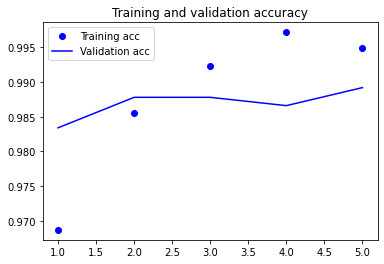

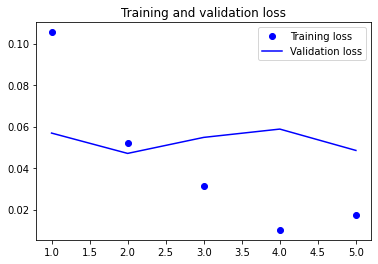

In [82]:
#Training accuracy

accuracy = modelfit.history['accuracy']
val_accuracy = modelfit.history['val_accuracy']
loss = modelfit.history['loss']
val_loss = modelfit.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [83]:
# Test prediction and accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)



precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", accuracy[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.994952380657196
Val Accuracy:	 0.9945999979972839
Test Accuracy:	 0.4303121736103052
Precision:	 0.5301109350237718
Recall:		 0.3906949581467783
F1 Score:	 0.4498487055922896
AUC:		 0.43974403079752705


Inception V3

In [85]:
#Using the Inception V3 pre-trained model 
from tensorflow.keras.applications.inception_v3 import InceptionV3
incpmodel = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=model_inp,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")
incpmodel.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 126, 126, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 126, 126, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 126, 126, 32) 0           batch_normalization[0][0]        
______________________

In [88]:
#Adding the last layer to the model
from tensorflow.keras import layers
last_layer = Flatten()(incpmodel.output)
out = Dense(1, activation='sigmoid', name='output')(last_layer) 
incpmodel = Model(model_inp, out)

for layer in incpmodel.layers[:-1]:
	layer.trainable = False

incpmodel.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 254, 254, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 126, 126, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 126, 126, 32) 96          conv2d_6[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 126, 126, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [89]:
incpmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [90]:
#Early stopping criterion
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='incpmodel.h5', save_best_only=True),
]

In [91]:
#Fitting the Inception model
modelfit = incpmodel.fit(train_X, train_y,
                               batch_size=10,
                               epochs=5, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/5
2100/2100 [==============================] - 380s 179ms/step - loss: 0.6384 - acc: 0.8222 - val_loss: 0.5035 - val_acc: 0.8968
Epoch 2/5
2100/2100 [==============================] - 409s 195ms/step - loss: 0.4747 - acc: 0.9022 - val_loss: 0.3952 - val_acc: 0.9032
Epoch 3/5
2100/2100 [==============================] - 410s 195ms/step - loss: 0.3767 - acc: 0.9086 - val_loss: 0.3278 - val_acc: 0.9134
Epoch 4/5
2100/2100 [==============================] - 437s 208ms/step - loss: 0.3189 - acc: 0.9164 - val_loss: 0.2836 - val_acc: 0.9150
Epoch 5/5
2100/2100 [==============================] - 423s 201ms/step - loss: 0.2762 - acc: 0.9211 - val_loss: 0.2530 - val_acc: 0.9184


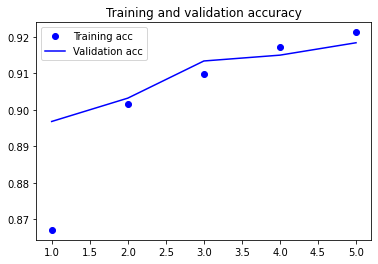

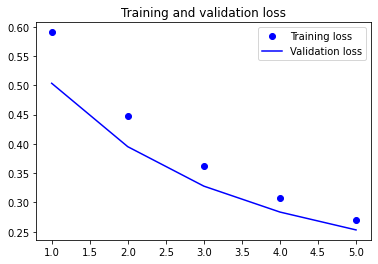

In [92]:
#Training accuracy

accuracy = modelfit.history['acc']
val_acc = modelfit.history['val_acc']
loss = modelfit.history['loss']
val_loss = modelfit.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [93]:
# Test prediction and accuracy
predictions = incpmodel.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)



precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", accuracy[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9212856888771057
Val Accuracy:	 0.91839998960495
Test Accuracy:	 0.4861320645236161
Precision:	 0.5791824882733974
Recall:		 0.504769320615145
F1 Score:	 0.5394216767214479
AUC:		 0.4816950051351587
